# BEETLE2

This is the Python Notebook with the project code, so the results can be viewed :)

In [ ]:
# This cell takes a bit to run but ensures that all packages needed to run the rest of the notebook are installed.
!pip install pydot
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tensorflow
!pip install git+https://github.com/tensorflow/docs
!pip install keras

In [1]:
# After installing all the packages required (in the cell above), import the necessary classes
import csv
import pydot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_docs as tfdocs
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.compat.v2 as tf
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm

#### Import the dataset
To train the Machine Learning models

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/marialuquea/Beetle2/main/Python%20Notebook/datasets/Processed-Population-Data.csv')
dataset.head(5)

,Footprint Area,Footprint Aspect Ratio,Span Length along x dir.,Span Length along y dir.,No of spans along x dir.,No of spans along y dir.,No of floors,Interstory heigh,Maximum spacing between secondary beamsa,Selfweight of composite floor deckb,...,Total formwork surface area (floor slabs)g,Total mass (rationalised) Columns 2,Total mass timber floors (Glulam beams + CLT slabs),Total mass (rationalised) Timber frame,Total mass steel connections,Total mass (rationalised) Columns plus Beams,Total No of (primary and secondary) beams 2,Total No of columnsd 2,Total No of (CLT) slabsh,Total No of connections 2
0,4826.674,0.888,5.266,7.275,14,9,2,3.581,2.6,2.15,...,7589.59,14.281744,651.986594,666.268338,67.74,226.075669,1054,150,965.3348,2258
1,4523.630,0.475,5.135,7.727,19,6,6,3.853,2.6,2.55,...,21375.02,182.377902,2061.961569,2244.339471,144.72,1006.674303,2202,420,2714.1780,4824
2,4653.114,0.906,5.119,9.275,14,7,10,3.717,2.6,2.55,...,37876.24,296.277610,3311.372882,3607.650492,207.00,1485.830508,3150,600,4653.1140,6900
3,3967.650,0.975,6.379,7.775,10,8,2,3.641,2.6,2.55,...,6376.56,19.101443,634.391681,653.493124,43.53,291.643444,676,99,793.5300,1451
4,2646.670,0.517,5.109,7.400,14,5,6,3.753,2.6,2.55,...,12306.08,95.461908,1168.934272,1264.396180,90.54,540.267268,1374,270,1588.0020,3018


In [15]:
for index, col in enumerate(dataset.columns):
    print(index, col)

0 Footprint Area
1 Footprint Aspect Ratio
2 Span Length along x dir.
3 Span Length along y dir.
4 No of spans along x dir.
5 No of spans along y dir.
6 No of floors
7 Interstory heigh
8 Maximum spacing between secondary beamsa
9 Selfweight of composite floor deckb
10 Weight of floor finisches
11 Variable floor load
12 Weigth of envelope
13 Total mass (optimised) structural steel frame
14 Total mass (rationalised) structural steel frame
15 Total (steel) mass of composite floor deck
16 Total (concrete) mass of composite floor deck
17 Total No of (primary and secondary) beams
18 Total No of columnsd
19 Total No of elements (Beams + Columns)
20 Total No of Column-to-column (Column-to-foundation) connections
21 Total No of Beam-to-column & Beam-to-Beam connections
22 Total No of connections
23 Total mass (optimised) Columns
24 Total mass (rationalised) Columns
25 Total mass Concrete floors (beams + slabs)
26 Total mass (optimised) Concrete  frame
27 Total mass (rationalised) Concrete  frame

Select the columns from the dataset that represent each material

In [21]:
# Basic Inputs - for all materials
basic_inputs = dataset.iloc[:,0:13]

# STEEL FRAME inputs
steel_inputs = dataset.iloc[:,15:23] 
steel_outputs = dataset.iloc[:,13:15]

# CONCRETE FRAME inputs
concrete_inputs = dataset.iloc[:,29:35]
concrete_outputs = dataset.iloc[:,23:28]

# GLULAM FRAME inputs
glulam_inputs = dataset.iloc[:, lambda dataset: [38, 40, 41, 42, 43]]
glulam_outputs = dataset.iloc[:, lambda dataset: [35, 36, 37, 39]]

#### Variables to predict

In [65]:
print("Predicting for Steel:")
for index, col in enumerate(steel_outputs.columns):
    print(index, col)
print("\nPredicting for Concrete:")
for index, col in enumerate(concrete_outputs.columns):
    print(index, col)
print("\nPredicting for Glulam:")
for index, col in enumerate(glulam_outputs.columns):
    print(index, col)

Predicting for Steel:
0 Total mass (optimised) structural steel frame
1 Total mass (rationalised) structural steel frame

Predicting for Concrete:
0 Total mass (optimised) Columns
1 Total mass (rationalised) Columns
2 Total mass Concrete floors (beams + slabs)
3 Total mass (optimised) Concrete  frame
4 Total mass (rationalised) Concrete  frame

Predicting for Glulam:
0 Total mass (rationalised) Columns 2
1 Total mass timber floors (Glulam beams + CLT slabs)
2 Total mass (rationalised) Timber  frame
3 Total mass (rationalised) Columns plus Beams


### Utility functions

Splits the given dataset inputs (different inputs for different materials) into training and testing sets. 

StandardScaler scales and translates each feature individually. More info [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

KFold is used for cross validation. Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [66]:
scaler = StandardScaler()
plt.style.use('ggplot')

In [67]:
def split_datasets(chosen_inputs, chosen_outputs):
    
    concatenated = pd.concat([basic_inputs, chosen_inputs], axis=1)
    X_traintest_concat, X_validation_concat, y_traintest_concat, y_validation_concat = train_test_split(concatenated, chosen_outputs, test_size = 0.2)
    X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(X_traintest_concat, y_traintest_concat, test_size = 0.2)
    
    X_train_scaled = scaler.fit_transform(X_train_concat)
    X_test_scaled = scaler.transform(X_test_concat)
    X_validation_scaled = scaler.transform(X_validation_concat)
    
    with_derived = [X_train_scaled, y_train_concat, X_test_scaled, y_test_concat, X_validation_scaled, y_validation_concat]
    print('Validation:\t', X_validation_scaled.shape, y_validation_concat.shape, '\n',
      'Training:  \t', X_train_scaled.shape, y_train_concat.shape, '\t Concatenated sets\n', 
      'Testing:   \t', X_test_scaled.shape, y_test_concat.shape, '\n')
    
    X_traintest, X_validation, y_traintest, y_validation = train_test_split(basic_inputs, chosen_outputs, test_size = 0.2)
    X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest, test_size = 0.2)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_validation_scaled = scaler.transform(X_validation)
    
    without = [X_train_scaled, y_train, X_test_scaled, y_test, X_validation_scaled, y_validation]
    print('Validation \t', X_validation_scaled.shape, y_validation.shape, '\n',
      'Training:  \t', X_train_scaled.shape, y_train.shape, '\t Without derived inputs sets\n',
      'Testing:   \t', X_test_scaled.shape, y_test.shape)
    
    return with_derived, without, concatenated.columns

The function below will plot a graph of true vs predicted values along with a line of what the perfect machine learning model should look like (predicting the exact, true values).

In [92]:
def visualizePredictionsVsActual(y_true, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, c='#FF7AA6') #A06CD5
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    ident = [0, max(y_true)]
    plt.plot(ident,ident, '--', c='#A06CD5')
    plt.savefig('graphs/'+title+'.png')
    plt.show()

This class is used to print text with colour to the console. 

In [69]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### RANDOM FOREST

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the ```max_samples``` parameter if ```bootstrap=True``` (default), otherwise the whole dataset is used to build each tree. More info [here](https://scikit-learn.org/stable/modules/ensemble.html#forest).

In [70]:
class RandomForest:
    def __init__(self, Xtrain, ytrain, Xtest, ytest, column_names=None, n_estimators=100):
        
        rf = RandomForestRegressor(n_estimators = n_estimators).fit(Xtrain, np.ravel(ytrain))
        
        self.model = rf
        self.feature_list = column_names
        
        self.predictions = rf.predict(Xtest)
        self.mse = mean_squared_error(ytest.values.flatten(), self.predictions)
        self.mae = mean_absolute_error(ytest.values.flatten(), self.predictions)
        self.mape = mean_absolute_percentage_error(ytest.values.flatten(), self.predictions)
        
#         print('Random forest model: \t{}MAE: {:10.3f} \tMSE: {:10.3f} \tMAPE: {:10.3f}%{}'.format(color.PURPLE, self.mae, self.mse, self.mape*100, color.END))
    
    def getImportances(self):
        print('-------------------VARIABLE IMPORTANCE--------------------')
        importances = list(self.model.feature_importances_)
        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(self.feature_list, importances)]
        feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
        [print('{:50s} {:7.2f}'.format(*pair)) for pair in feature_importances]
        print('-'*58)
        return feature_importances
    
    def makeTree(self):
        tree = self.model.estimators_[5]
        export_graphviz(tree, out_file = 'images/tree.dot', feature_names = self.feature_list, rounded = True, precision = 1)
        (graph, ) = pydot.graph_from_dot_file('images/tree.dot')
        graph.write_png('images/tree.png')
        rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
        rf_small.fit(self.inputs_train, np.ravel(self.output_train))
        tree_small = rf_small.estimators_[5]
        export_graphviz(tree_small, out_file = 'images/small_tree.dot', feature_names = self.feature_list, rounded = True, precision = 1)
        (graph, ) = pydot.graph_from_dot_file('images/small_tree.dot')
        graph.write_png('images/small_tree.png')

In [88]:
def run_rf(chosen_inputs, chosen_outputs, material):
    
    print(f'Predicting {chosen_outputs.shape[1]} values.')
    
    for column in chosen_outputs:
        print('\n',color.BOLD + color.UNDERLINE + color.RED + column.upper() + color.END)
        with_derived, without, column_names = split_datasets(chosen_inputs, chosen_outputs[column])

        print('\n', color.BOLD + 'WITH DERIVED INPUTS' + color.END)
        rf = RandomForest(with_derived[0], with_derived[1], with_derived[2], with_derived[3], column_names)
        rf.getImportances()
        y_pred = rf.model.predict(with_derived[4]) # with_derived[4] is the X_validation set, with_derived[5] is y_validation
        visualizePredictionsVsActual(with_derived[5], y_pred, 'Predicting '+column+' for '+material+' using RF and derived inputs')

#         print(color.BOLD + 'WITHOUT DERIVED INPUTS' + color.END)
#         rf = RandomForest(without[0], without[1], without[2], without[3], basic_inputs.columns)
#         rf.getImportances()
#         y_pred = rf.model.predict(without[4])
#         visualizePredictionsVsActual(without[5], y_pred, 'Predicting '+column+' using RF without derived inputs')

### SUPPORT VECTOR REGRESSOR

Linear Support Vector Regression.

Similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. More info [here](https://scikit-learn.org/stable/modules/svm.html#svm-regression).

In [72]:
class SVR:
    def __init__(self, Xtrain, ytrain, Xtest, ytest):
        
        self.model = LinearSVR().fit(Xtrain, np.ravel(ytrain))
        self.predictions = self.model.predict(Xtest)
        self.errors = abs(self.predictions - ytest) 
        self.mse = mean_squared_error(ytest, self.predictions)
        self.mae = mean_absolute_error(ytest, self.predictions)
        self.mape = np.mean(100 * (self.errors / ytest))
        
#         print('SVR model: {}\t\tMAE: {:10.3f} \tMSE: {:10.3f} \tMAPE: {:10.3f}{}'.format(color.PURPLE, self.mae, self.mse, self.mape, color.END))

In [73]:
def run_svr(chosen_inputs, chosen_outputs):
    
    print(f'Predicting {chosen_outputs.shape[1]} values.')
    
    for column in chosen_outputs:
        print('\n',color.BOLD + color.UNDERLINE + color.RED + column.upper() + color.END)
        with_derived, without, _ = split_datasets(chosen_inputs, chosen_outputs[column])

        print('\n',color.BOLD + 'WITH DERIVED INPUTS' + color.END)
        svr = SVR(with_derived[0], with_derived[1], with_derived[2], with_derived[3].values.flatten())
        y_pred = svr.model.predict(with_derived[4])
        visualizePredictionsVsActual(with_derived[5], y_pred, 'Predicting '+column+' using SVR and derived inputs')

        print(color.BOLD + 'WITHOUT DERIVED INPUTS' + color.END)
        svr = SVR(without[0], without[1], without[2], without[3].values.flatten())
        y_pred = svr.model.predict(without[4])
        visualizePredictionsVsActual(without[5], y_pred, 'Predicting '+column+' using SVR without derived inputs')

### ARTIFICIAL NEURAL NETWORK

In [74]:
class ANN:
    def __init__(self, Xtrain, ytrain, Xtest, ytest):
        
        model = Sequential()
        model.add(Dense(30, input_dim=Xtrain.shape[1], kernel_initializer='he_uniform', activation='relu'))
        model.add(Dropout(rate=0.3))
        model.add(Dense(1, kernel_initializer='he_uniform'))
        model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
        model.fit(Xtrain, ytrain, verbose=0, epochs=100)
        
        self.model = model
        self.predictions = model.predict(Xtest)
        self.mse = mean_squared_error(ytest, self.predictions)
        self.mae = mean_absolute_error(ytest, self.predictions)
        
        errors = np.absolute(np.array(self.predictions).flatten() - np.array(ytest))
        self.mape = np.mean(100 * (errors / ytest))
        
#         print('ANN model: \t{}MAE: {:10.3f} \tMSE: {:10.3f} \tMAPE: {:10.3f}{}'.format(color.PURPLE, self.mae, self.mse, self.mape, color.END))
        
    def visualizeNeuralNetwork(self):
        plot_model(self.model,
           show_shapes=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=96)

In [87]:
def run_ann(chosen_inputs, chosen_outputs, material):
    
    print(f'Predicting {chosen_outputs.shape[1]} values.')
    
    for column in chosen_outputs:
        print('\n',color.BOLD + color.UNDERLINE + color.RED + column.upper() + color.END)
        with_derived, without, _ = split_datasets(chosen_inputs, chosen_outputs[column])

        print('\n',color.BOLD + 'WITH DERIVED INPUTS' + color.END)
        ann = ANN(with_derived[0], with_derived[1], with_derived[2], with_derived[3])
        y_pred = ann.model.predict(with_derived[4])
        visualizePredictionsVsActual(with_derived[5].values, y_pred, 'Predicting '+column+' for '+material+' using ANN and derived inputs')

#         print(color.BOLD + 'WITHOUT DERIVED INPUTS' + color.END)
#         ann = ANN(without[0], without[1], without[2], without[3])
#         y_pred = ann.model.predict(without[4])
#         visualizePredictionsVsActual(without[5], y_pred, 'Predicting '+column+' using ANN without derived inputs')

# Predicting for Steel

We are going to make predictions with 2 different data sets, using the basic inputs that all materials share, and using the concatenated basic inputs with each derived material input. This will allow us to see if less variables can be used to make predictions and compare how efficient they are.

###### Random Forest for Steel

The Random Forest algorithm also prints the importance of each variable when making the predictions. 

Predicting 2 values.

 TOTAL MASS (OPTIMISED) STRUCTURAL STEEL FRAME
Validation:	 (2096, 21) (2096,) 
 Training:  	 (6704, 21) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 21) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total (concrete) mass of composite floor deck         0.85
Span Length along y dir.                              0.12
Weight of floor finisches                             0.01
Variable floor load                                   0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory

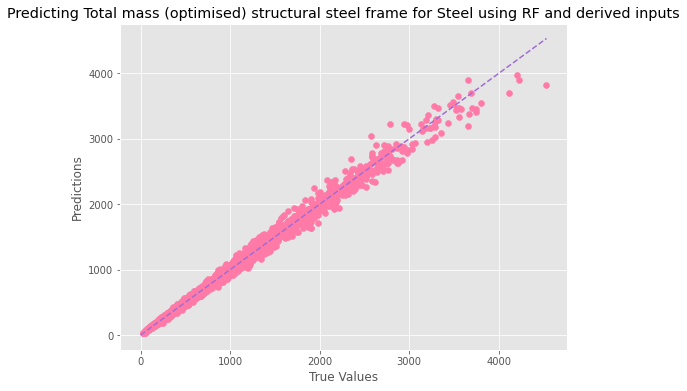


 TOTAL MASS (RATIONALISED) STRUCTURAL STEEL FRAME
Validation:	 (2096, 21) (2096,) 
 Training:  	 (6704, 21) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 21) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total (concrete) mass of composite floor deck         0.87
Span Length along y dir.                              0.10
Total (steel) mass of composite floor deck            0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                                      0.00
Maximum spacing between seco

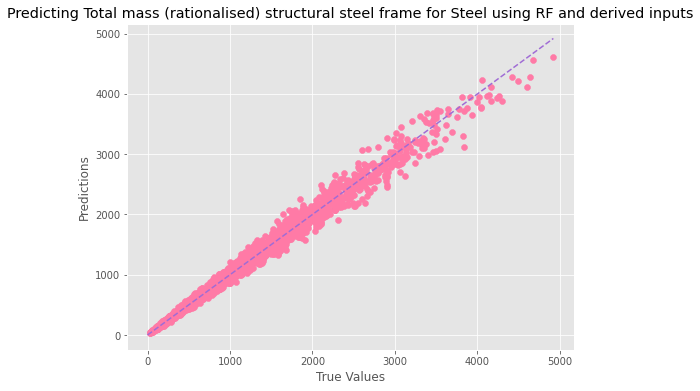

In [93]:
run_rf(steel_inputs, steel_outputs, "Steel")

###### Support Vector Regressor for Steel

Predicting 1 values.

 TOTAL MASS (RATIONALISED) STRUCTURAL STEEL FRAME
Validation:	 (2096, 21) (2096,) 
 Training:  	 (6704, 21) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 21) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:    131.591 	MSE:  45953.434 	MAPE:     23.411


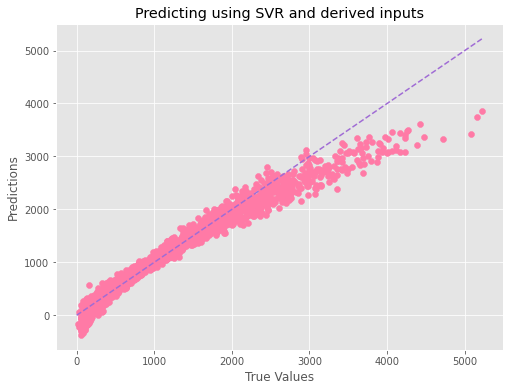

WITHOUT DERIVED INPUTS
SVR model: 		MAE:    235.282 	MSE: 122795.107 	MAPE:     62.658


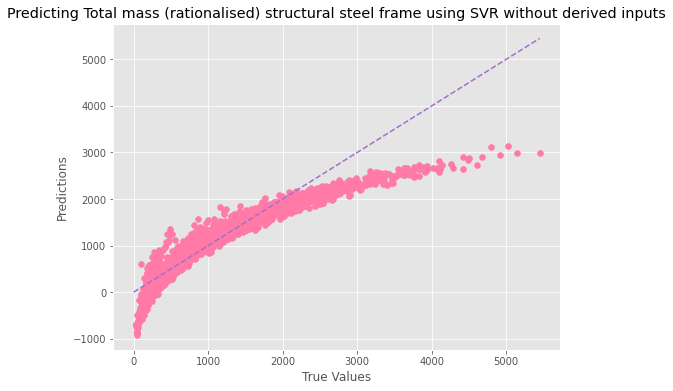

In [15]:
run_svr(steel_inputs, steel_outputs)

###### Artificial Neural Network for Steel

Predicting 2 values.

 TOTAL MASS (OPTIMISED) STRUCTURAL STEEL FRAME
Validation:	 (2096, 21) (2096,) 
 Training:  	 (6704, 21) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 21) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


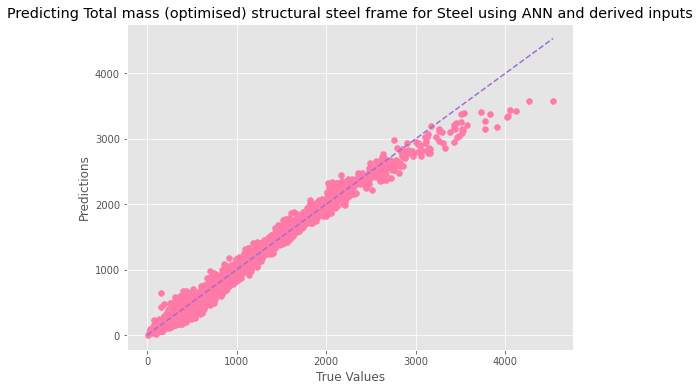


 TOTAL MASS (RATIONALISED) STRUCTURAL STEEL FRAME
Validation:	 (2096, 21) (2096,) 
 Training:  	 (6704, 21) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 21) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


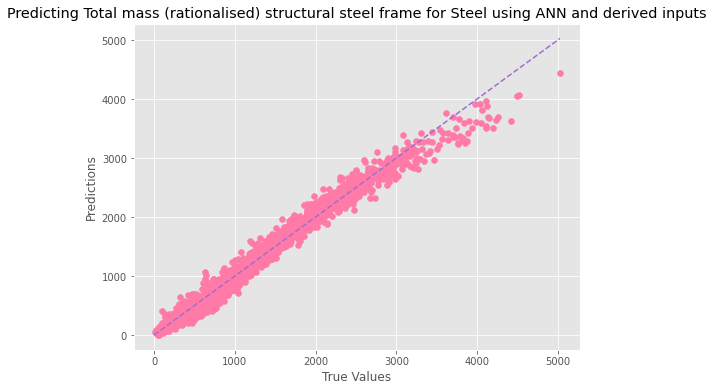

In [94]:
run_ann(steel_inputs, steel_outputs, "Steel")

# Predicting for Reinforced Concrete

###### Random Forest for Reinforced Concrete

Predicting 5 values.

 TOTAL MASS (OPTIMISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total formwork surface area (columns)                 0.82
Total formwork surface area (floor slabs)g            0.14
No of floors                                          0.02
Span Length along y dir.                              0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
Interstory heigh                                      0.00
Maximum spacing between s

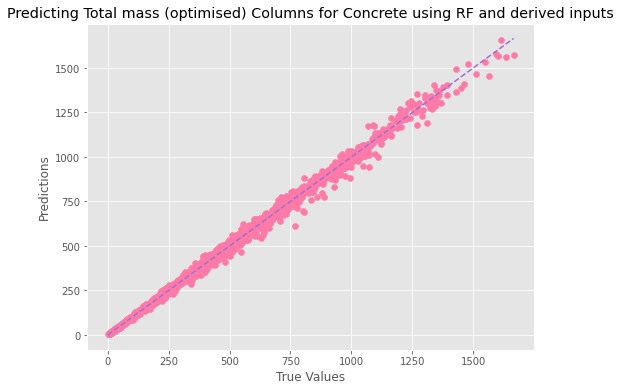


 TOTAL MASS (RATIONALISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total formwork surface area (columns)                 0.81
Total formwork surface area (floor slabs)g            0.13
No of floors                                          0.03
Span Length along y dir.                              0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
Interstory heigh                                      0.00
Maximum spacing between secondary beamsa   

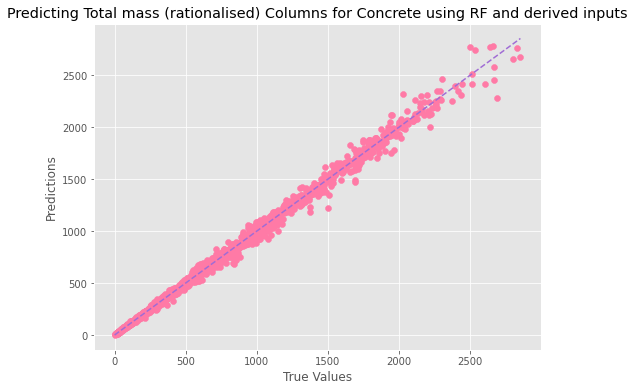


 TOTAL MASS CONCRETE FLOORS (BEAMS + SLABS)
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total formwork surface area (floor slabs)g            0.97
Span Length along y dir.                              0.03
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                                      0.00
Maximum spacing between secondary beamsa              0.00
Selfweight of composite floor deck

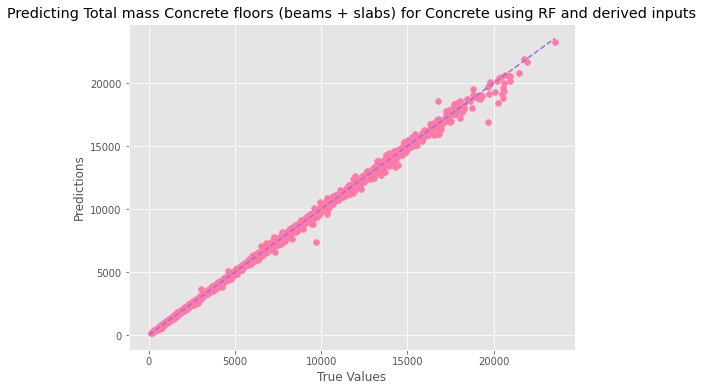


 TOTAL MASS (OPTIMISED) CONCRETE  FRAME
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total formwork surface area (floor slabs)g            0.97
Span Length along y dir.                              0.03
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                                      0.00
Maximum spacing between secondary beamsa              0.00
Selfweight of composite floor deckb   

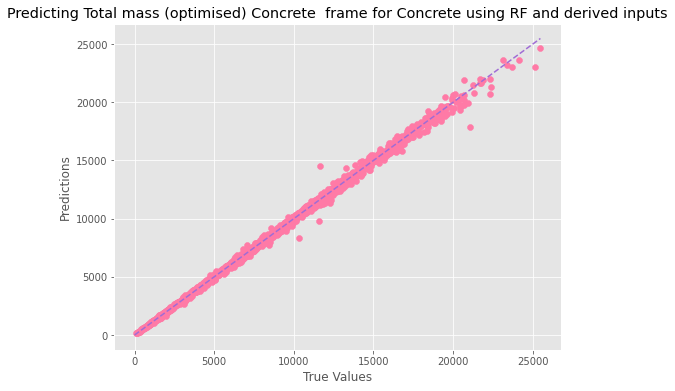


 TOTAL MASS (RATIONALISED) CONCRETE  FRAME
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total formwork surface area (floor slabs)g            0.97
Span Length along y dir.                              0.03
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                                      0.00
Maximum spacing between secondary beamsa              0.00
Selfweight of composite floor deckb

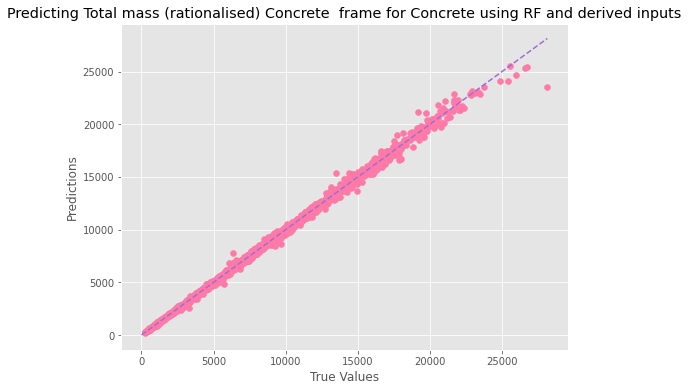

In [95]:
run_rf(concrete_inputs, concrete_outputs, 'Concrete')

###### SVR for Reinforced Concrete

Predicting 3 values.

 TOTAL MASS (OPTIMISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     22.883 	MSE:   1463.696 	MAPE:     20.850


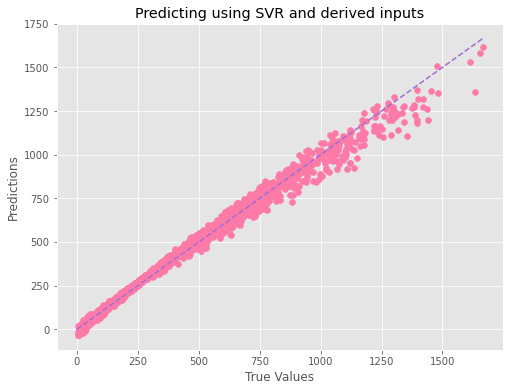

WITHOUT DERIVED INPUTS
SVR model: 		MAE:     95.477 	MSE:  20292.277 	MAPE:    121.579


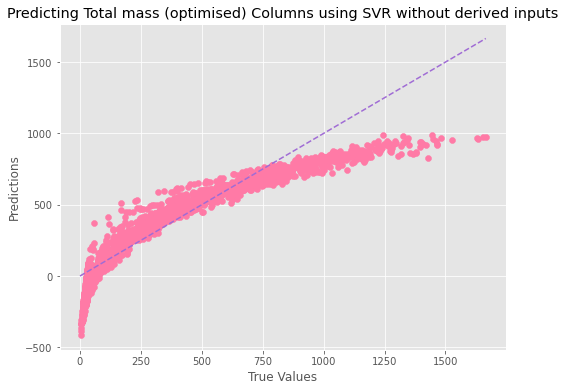


 TOTAL MASS (RATIONALISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     65.141 	MSE:  10938.007 	MAPE:     57.468


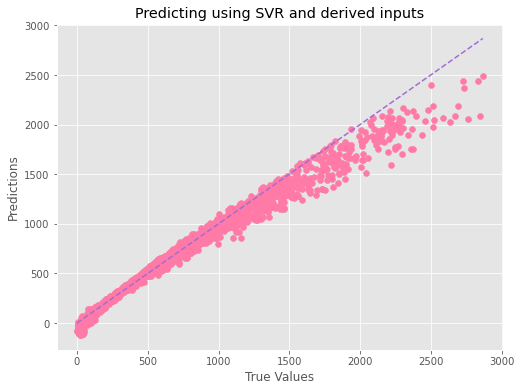

WITHOUT DERIVED INPUTS
SVR model: 		MAE:    174.621 	MSE:  74133.810 	MAPE:    198.432


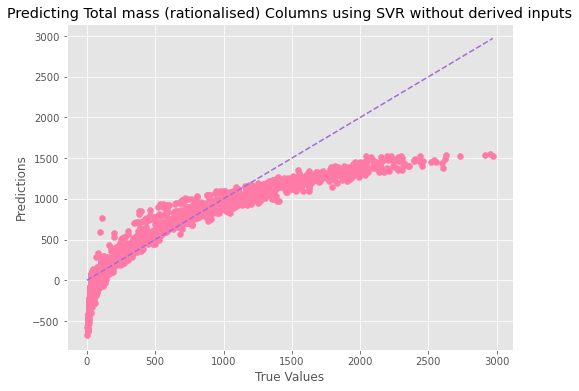


 TOTAL MASS CONCRETE FLOORS (BEAMS + SLABS)
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:   1609.941 	MSE: 5300051.096 	MAPE:     20.897


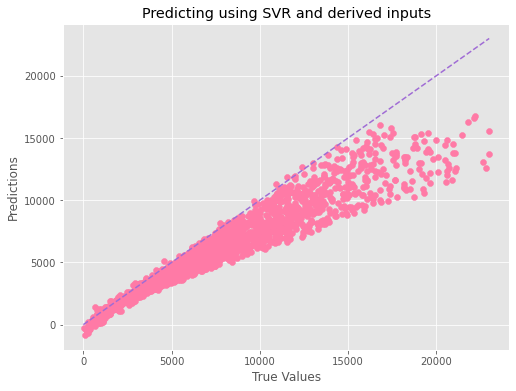

WITHOUT DERIVED INPUTS
SVR model: 		MAE:   2880.212 	MSE: 16082204.142 	MAPE:     37.084


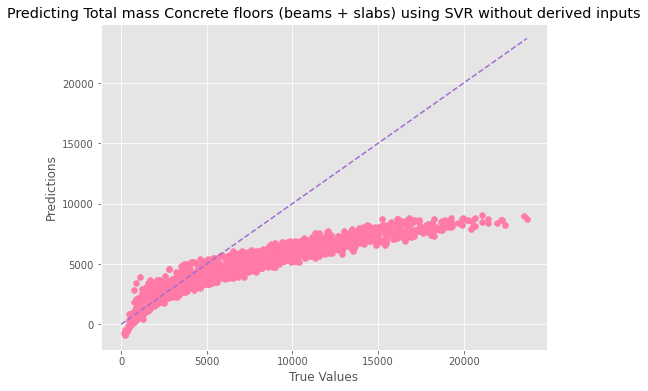

In [18]:
run_svr(concrete_inputs, concrete_outputs)

###### Artificial Neural Network for Reinforced Concrete

Predicting 5 values.

 TOTAL MASS (OPTIMISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


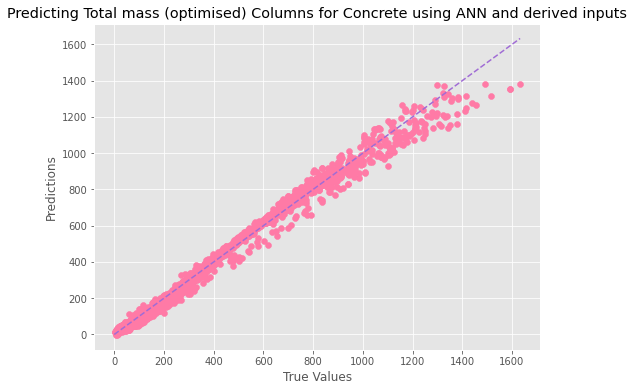


 TOTAL MASS (RATIONALISED) COLUMNS
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


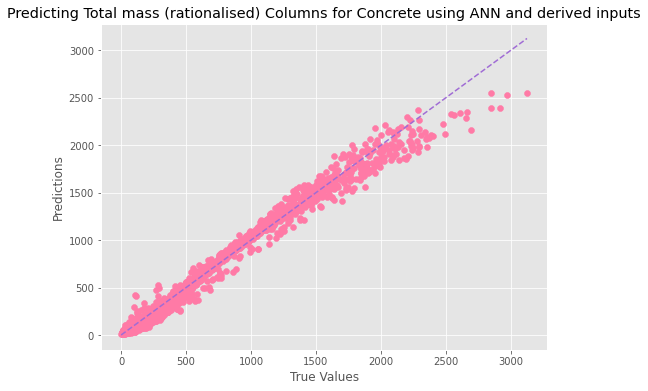


 TOTAL MASS CONCRETE FLOORS (BEAMS + SLABS)
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


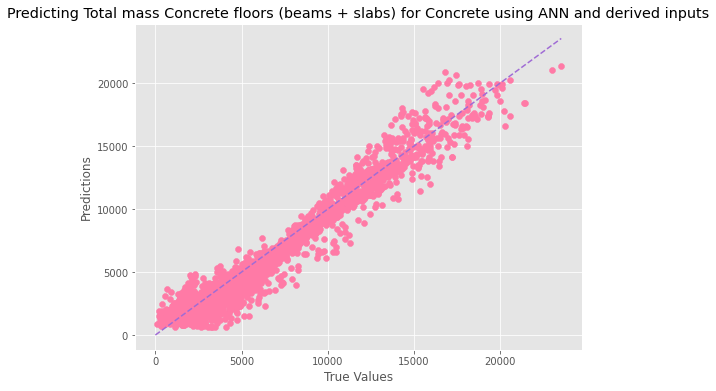


 TOTAL MASS (OPTIMISED) CONCRETE  FRAME
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


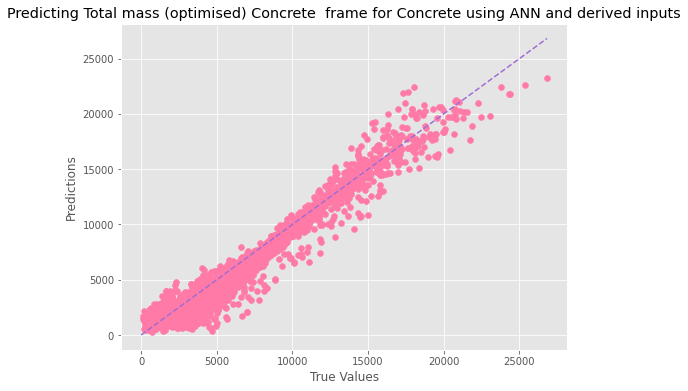


 TOTAL MASS (RATIONALISED) CONCRETE  FRAME
Validation:	 (2096, 19) (2096,) 
 Training:  	 (6704, 19) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 19) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


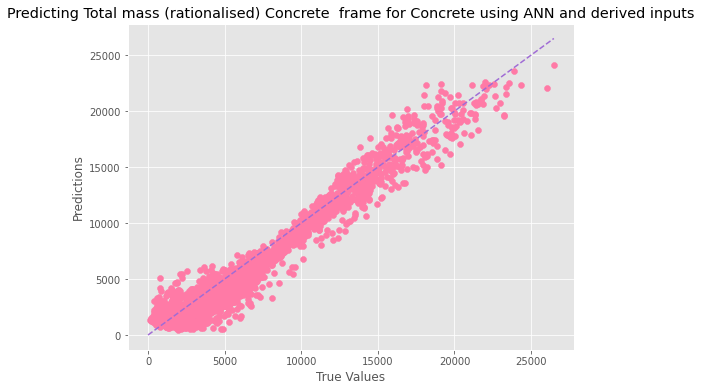

In [96]:
run_ann(concrete_inputs, concrete_outputs, "Concrete")

# Predicting for Glulam

###### Random Forest for Glulam

Predicting 4 values.

 TOTAL MASS (RATIONALISED) COLUMNS 2
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total No of (CLT) slabsh                              0.73
No of floors                                          0.13
Variable floor load                                   0.07
Weight of floor finisches                             0.06
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
Span Length along y dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
Interstory heigh    

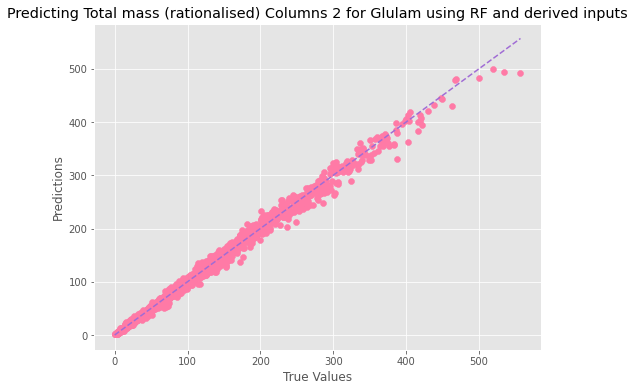


 TOTAL MASS TIMBER FLOORS (GLULAM BEAMS + CLT SLABS)
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total No of (CLT) slabsh                              0.98
Span Length along y dir.                              0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                                      0.00
Maximum spacing between secondary beamsa              0.00
Selfweight of composite f

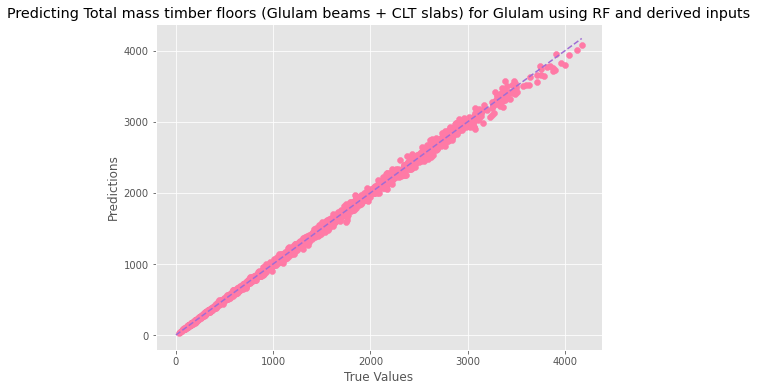


 TOTAL MASS (RATIONALISED) TIMBER  FRAME
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total No of (CLT) slabsh                              0.98
Weight of floor finisches                             0.01
Variable floor load                                   0.01
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
Span Length along y dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                     

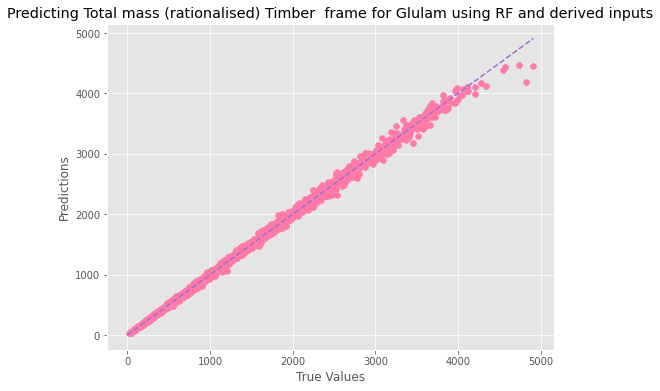


 TOTAL MASS (RATIONALISED) COLUMNS PLUS BEAMS
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
-------------------VARIABLE IMPORTANCE--------------------
Total No of (CLT) slabsh                              0.90
Span Length along y dir.                              0.03
Weight of floor finisches                             0.03
Variable floor load                                   0.03
Footprint Area                                        0.00
Footprint Aspect Ratio                                0.00
Span Length along x dir.                              0.00
No of spans along x dir.                              0.00
No of spans along y dir.                              0.00
No of floors                                          0.00
Interstory heigh                

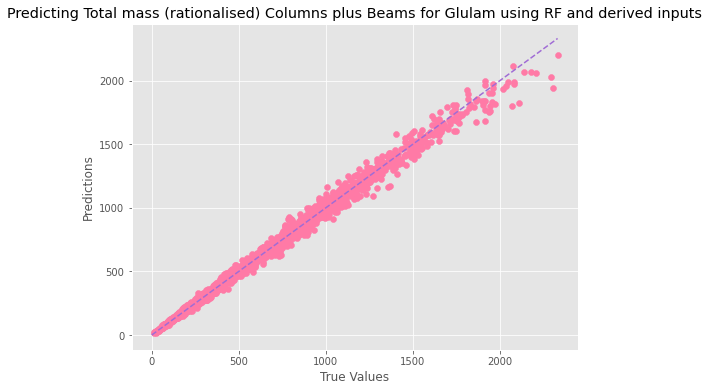

In [97]:
run_rf(glulam_inputs, glulam_outputs, 'Glulam')

###### Support Vector Regression for Glulam

Predicting 4 values.

 TOTAL MASS (RATIONALISED) COLUMNS 2
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     21.725 	MSE:   1242.068 	MAPE:    128.178


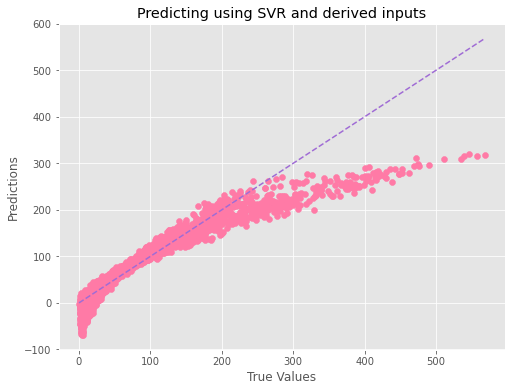

WITHOUT DERIVED INPUTS
SVR model: 		MAE:     28.442 	MSE:   2122.702 	MAPE:    185.745


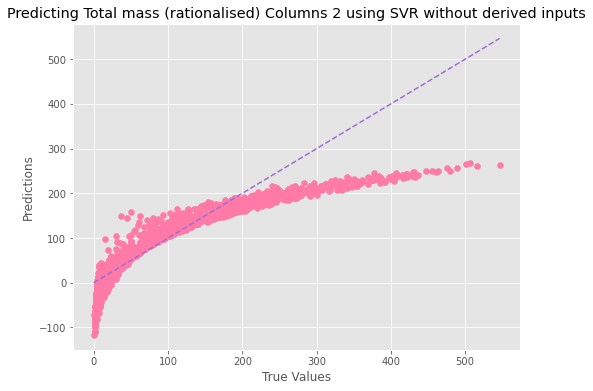


 TOTAL MASS TIMBER FLOORS (GLULAM BEAMS + CLT SLABS)
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     58.037 	MSE:   6976.590 	MAPE:     11.204


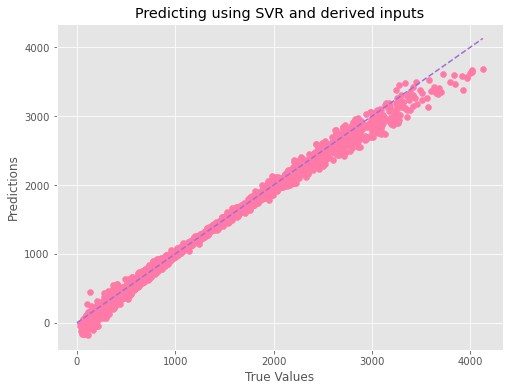

WITHOUT DERIVED INPUTS
SVR model: 		MAE:    197.649 	MSE:  75477.646 	MAPE:     46.805


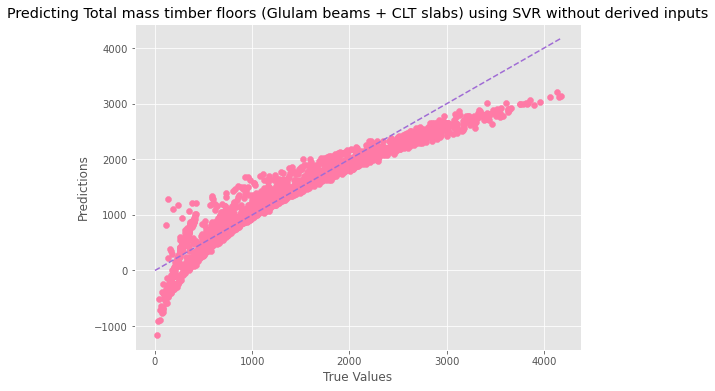


 TOTAL MASS (RATIONALISED) TIMBER  FRAME
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     75.829 	MSE:  12750.376 	MAPE:     12.949


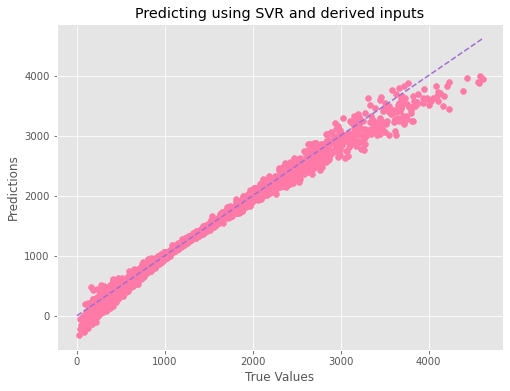

WITHOUT DERIVED INPUTS
SVR model: 		MAE:    226.565 	MSE: 101332.987 	MAPE:     47.840


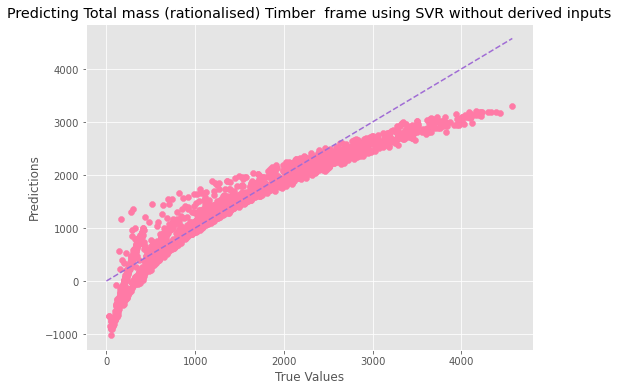


 TOTAL MASS (RATIONALISED) COLUMNS PLUS BEAMS
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS
SVR model: 		MAE:     66.725 	MSE:  10748.150 	MAPE:     23.748


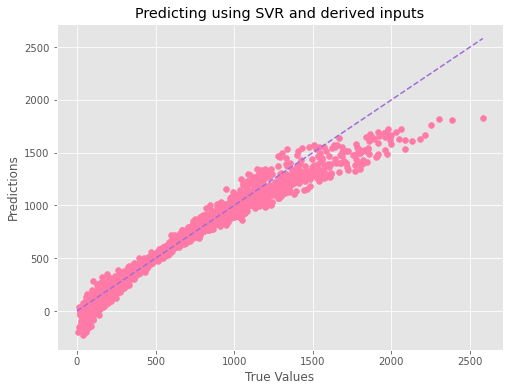

WITHOUT DERIVED INPUTS
SVR model: 		MAE:    105.656 	MSE:  24307.969 	MAPE:     53.906


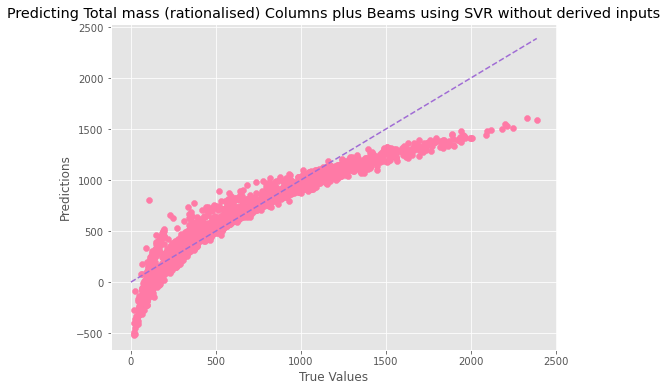

In [21]:
run_svr(glulam_inputs, glulam_outputs)

###### Artificial Neural Network for Glulam

Predicting 4 values.

 TOTAL MASS (RATIONALISED) COLUMNS 2
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


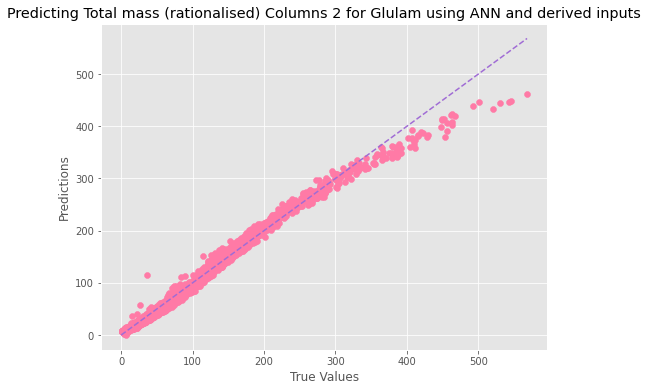


 TOTAL MASS TIMBER FLOORS (GLULAM BEAMS + CLT SLABS)
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


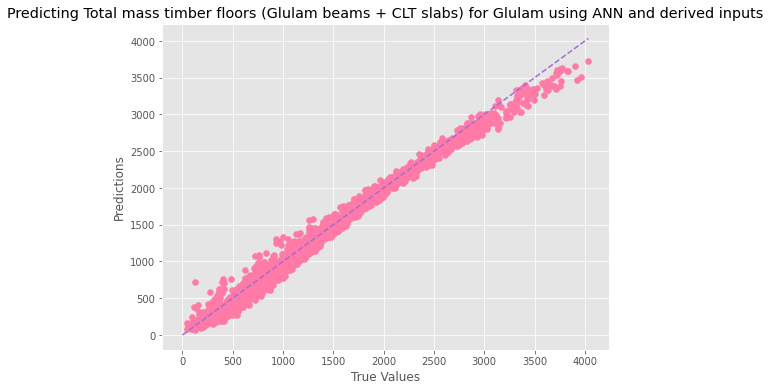


 TOTAL MASS (RATIONALISED) TIMBER  FRAME
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


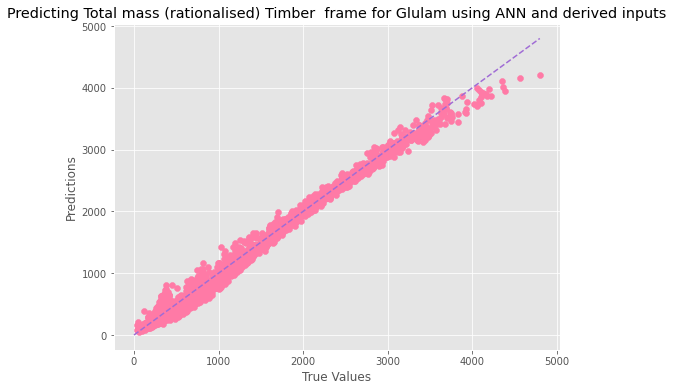


 TOTAL MASS (RATIONALISED) COLUMNS PLUS BEAMS
Validation:	 (2096, 18) (2096,) 
 Training:  	 (6704, 18) (6704,) 	 Concatenated sets
 Testing:   	 (1676, 18) (1676,) 

Validation 	 (2096, 13) (2096,) 
 Training:  	 (6704, 13) (6704,) 	 Without derived inputs sets
 Testing:   	 (1676, 13) (1676,)

 WITH DERIVED INPUTS


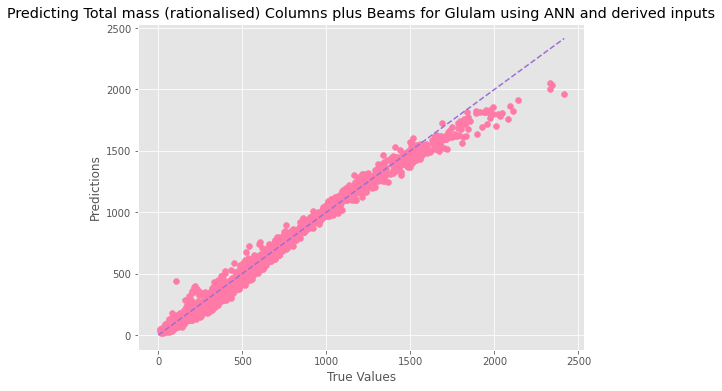

In [98]:
run_ann(glulam_inputs, glulam_outputs, "Glulam")

# Cross Validation

In [35]:
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)

The chosen algorithm (rf, svr or ann) is trained 10 times, evaluated each time and then the results are averaged, to get an estimate of how good the algorithm is no matter what dataset it was trained on.

In [56]:
def evaluate(X, y, algorithm):
    count = 0
    avg_explained_variance_score = 0
    avg_max_error = 0
    avg_mae = 0
    avg_mse = 0
    avg_mape = 0
    model = None

    for train, test in kfold.split(X):
#         print(color.BOLD + color.RED + "Test:", str(count+1) + color.END)

        # split dataset into k folds
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_true = y.iloc[train], y.iloc[test]

        #feature scaling
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # run model
        if algorithm == 'rf':
            model = RandomForest(X_train, y_train, X_test, y_true)
        elif algorithm == 'rf_10':
            model = RandomForest(X_train, y_train, X_test, y_true, n_estimators=10)
        elif algorithm == 'svr':
            model = SVR(X_train, y_train, X_test, y_true)
        elif algorithm == 'ann':
            model = ANN(X_train, y_train, X_test, y_true)
        else:
            raise Exception("Algorithm '{}' not valid, choose 'rf', 'svr' or 'ann'.".format(algorithm))

        # get metrics
        avg_explained_variance_score += explained_variance_score(y_true, model.predictions)
        avg_max_error += max_error(y_true, model.predictions)
        avg_mae += model.mae
        avg_mse += model.mse
        avg_mape += model.mape

        count += 1

    avg_explained_variance_score = avg_explained_variance_score / count
    avg_max_error = avg_max_error / count
    avg_mae = avg_mae / count
    avg_mse = avg_mse / count
    avg_mape = avg_mape / count
    
    return avg_explained_variance_score, avg_max_error, avg_mae, avg_mse, avg_mape

## Cross validation for Steel

The variables we use to train the algorithms and make predictions:

In [53]:
concatenated = pd.concat([basic_inputs, steel_inputs], axis=1)
concatenated.head(5)

,Footprint Area,Footprint Aspect Ratio,Span Length along x dir.,Span Length along y dir.,No of spans along x dir.,No of spans along y dir.,No of floors,Interstory heigh,Maximum spacing between secondary beamsa,Selfweight of composite floor deckb,...,Variable floor load,Weigth of envelope,Total (steel) mass of composite floor deck,Total (concrete) mass of composite floor deck,Total No of (primary and secondary) beams,Total No of columnsd,Total No of elements (Beams + Columns),Total No of Column-to-column (Column-to-foundation) connections,Total No of Beam-to-column & Beam-to-Beam connections,Total No of connections
0,4826.674,0.888,5.266,7.275,14,9,2,3.581,2.6,2.15,...,2.15,3.61,111.90,2116.40,1054,150,1204,150,2108,2258
1,4523.630,0.475,5.135,7.727,19,6,6,3.853,2.6,2.55,...,4.20,7.16,314.63,7057.64,2202,420,2622,420,4404,4824
2,4653.114,0.906,5.119,9.275,14,7,10,3.717,2.6,2.55,...,2.80,5.86,539.39,12099.43,3150,600,3750,600,6300,6900
3,3967.650,0.975,6.379,7.775,10,8,2,3.641,2.6,2.55,...,4.02,9.40,91.99,2063.40,676,99,775,99,1352,1451
4,2646.670,0.517,5.109,7.400,14,5,6,3.753,2.6,2.55,...,3.77,6.38,184.08,4129.26,1374,270,1644,270,2748,3018


The variable we're trying to predict:

In [54]:
steel_outputs.head(5)

,Total mass (optimised) structural steel frame,Total mass (rationalised) structural steel frame
0,363.79,371.93
1,1556.08,1718.14
2,2733.37,3078.29
3,472.57,486.00
4,849.48,944.18


#### Random Forest with 100 trees

In [39]:
for column in steel_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, steel_outputs[column], 'rf')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) structural steel frame
Avg explained variance score:	 0.9927923843306544 
Avg max error:			 477.8963400000005 
Avg MAE:			 43.79217468188826 
Avg MSE:			 4582.2689222721565 
Avg MAPE:			 0.045498463930112865 %

Total mass (rationalised) structural steel frame
Avg explained variance score:	 0.9892487066968206 
Avg max error:			 634.00966 
Avg MAE:			 61.862447851066655 
Avg MSE:			 9041.767403720281 
Avg MAPE:			 0.05604591315631193 %



#### Random Forest with 10 trees

In [58]:
for column in steel_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, steel_outputs[column], 'rf_10')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) structural steel frame
Avg explained variance score:	 0.9912818934414812 
Avg max error:			 478.4019999999999 
Avg MAE:			 48.42593337862814 
Avg MSE:			 5541.065225534953 
Avg MAPE:			 0.05032245115752567 %

Total mass (rationalised) structural steel frame
Avg explained variance score:	 0.98704539281776 
Avg max error:			 678.8298000000002 
Avg MAE:			 68.1845125124857 
Avg MSE:			 10886.473071078795 
Avg MAPE:			 0.06124503107603515 %



#### SVR

In [40]:
for column in steel_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, steel_outputs[column], 'svr')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) structural steel frame
Avg explained variance score:	 0.9622592717545986 
Avg max error:			 1127.6639427831283 
Avg MAE:			 100.17678324882098 
Avg MSE:			 25380.051179842478 
Avg MAPE:			 19.98882223811949 %

Total mass (rationalised) structural steel frame
Avg explained variance score:	 0.9594443582997553 
Avg max error:			 1380.1910659918453 
Avg MAE:			 119.63728869837514 
Avg MSE:			 36474.4357795901 
Avg MAPE:			 21.47480748737238 %



#### ANN

In [41]:
for column in steel_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, steel_outputs[column], 'ann')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) structural steel frame
Avg explained variance score:	 0.9845689364996444 
Avg max error:			 758.3596103515623 
Avg MAE:			 70.38779893766254 
Avg MSE:			 10277.093078692164 
Avg MAPE:			 10.269575323742556 %

Total mass (rationalised) structural steel frame
Avg explained variance score:	 0.9823003442110642 
Avg max error:			 941.8968623046876 
Avg MAE:			 87.625386484962 
Avg MSE:			 15465.426245717168 
Avg MAPE:			 11.687850078724926 %



## Cross validation for Concrete

The variables we use to train the algorithms and make predictions:

In [59]:
concatenated = pd.concat([basic_inputs, concrete_inputs], axis=1)
concatenated.head(5)

,Footprint Area,Footprint Aspect Ratio,Span Length along x dir.,Span Length along y dir.,No of spans along x dir.,No of spans along y dir.,No of floors,Interstory heigh,Maximum spacing between secondary beamsa,Selfweight of composite floor deckb,Weight of floor finisches,Variable floor load,Weigth of envelope,Total No of beamse,Total No of columns,Total No of elements (Beams + Columns) 2,Formwork surface area (beams),Total formwork surface area (columns),Total formwork surface area (floor slabs)g
0,4826.674,0.888,5.266,7.275,14,9,2,3.581,2.6,2.15,0.00,2.15,3.61,316,300,616,856.35,210.24,7589.59
1,4523.630,0.475,5.135,7.727,19,6,6,3.853,2.6,2.55,1.65,4.20,7.16,870,840,1710,2525.53,937.95,21375.02
2,4653.114,0.906,5.119,9.275,14,7,10,3.717,2.6,2.55,0.25,2.80,5.86,1260,1200,2460,3745.08,1882.97,37876.24
3,3967.650,0.975,6.379,7.775,10,8,2,3.641,2.6,2.55,1.47,4.02,9.40,212,198,410,810.66,152.41,6376.56
4,2646.670,0.517,5.109,7.400,14,5,6,3.753,2.6,2.55,1.22,3.77,6.38,564,540,1104,1559.50,558.79,12306.08


The variable we're trying to predict: 

In [60]:
concrete_outputs.head(5)

,Total mass (optimised) Columns,Total mass (rationalised) Columns,Total mass Concrete floors (beams + slabs),Total mass (optimised) Concrete frame,Total mass (rationalised) Concrete frame
0,85.81,103.55,3382.45,3468.25,3486.00
1,521.99,833.36,10122.45,10644.44,10955.80
2,1298.46,2240.66,18200.71,19499.16,20441.37
3,70.60,88.04,2979.96,3050.56,3068.00
4,299.69,475.36,5776.67,6076.36,6252.03


#### Random Forest

In [44]:
for column in concrete_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, concrete_outputs[column], 'rf')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) Columns
Avg explained variance score:	 0.9971384462037426 
Avg max error:			 147.2151 
Avg MAE:			 10.574498786928483 
Avg MSE:			 344.1543665938566 
Avg MAPE:			 0.029012376300632636 %

Total mass (rationalised) Columns
Avg explained variance score:	 0.997077742440573 
Avg max error:			 266.78025 
Avg MAE:			 18.25810183269902 
Avg MSE:			 1060.5475909970307 
Avg MAPE:			 0.03141515372289427 %

Total mass Concrete floors (beams + slabs)
Avg explained variance score:	 0.9987703034077757 
Avg max error:			 1853.0247900000008 
Avg MAE:			 94.93007065799588 
Avg MSE:			 28271.34529077846 
Avg MAPE:			 0.015388192114052401 %

Total mass (optimised) Concrete  frame
Avg explained variance score:	 0.9986273640831579 
Avg max error:			 1951.6260699999973 
Avg MAE:			 111.49606036857396 
Avg MSE:			 36162.0088968417 
Avg MAPE:			 0.016881096955182376 %

Total mass (rationalised) Concrete  frame
Avg explained variance score:	 0.9984217957399781 
Avg max error:			 2167.3695

#### Random Forest with 10 trees

In [61]:
for column in concrete_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, concrete_outputs[column], 'rf_10')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) Columns
Avg explained variance score:	 0.9965001431338714 
Avg max error:			 158.15350000000004 
Avg MAE:			 12.01473438841984 
Avg MSE:			 421.29934097536415 
Avg MAPE:			 0.033353339831834396 %

Total mass (rationalised) Columns
Avg explained variance score:	 0.9963476716492614 
Avg max error:			 294.76740000000007 
Avg MAE:			 20.592375683340986 
Avg MSE:			 1324.500689697054 
Avg MAPE:			 0.03565711469673897 %

Total mass Concrete floors (beams + slabs)
Avg explained variance score:	 0.9984748627737254 
Avg max error:			 2120.9394 
Avg MAE:			 106.81135376229432 
Avg MSE:			 35108.35583391776 
Avg MAPE:			 0.017075407418901088 %

Total mass (optimised) Concrete  frame
Avg explained variance score:	 0.9983222439177732 
Avg max error:			 2167.9893 
Avg MAE:			 124.61831905608172 
Avg MSE:			 44196.267069879206 
Avg MAPE:			 0.018820014607914288 %

Total mass (rationalised) Concrete  frame
Avg explained variance score:	 0.9980258351554667 
Avg max error:			 2644

#### Support Vector Regressor

In [45]:
for column in concrete_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, concrete_outputs[column], 'svr')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) Columns
Avg explained variance score:	 0.9906233966657607 
Avg max error:			 283.12852517170523 
Avg MAE:			 19.815833526297755 
Avg MSE:			 1191.22443193082 
Avg MAPE:			 15.241164668464403 %

Total mass (rationalised) Columns
Avg explained variance score:	 0.9833801371933231 
Avg max error:			 604.852656057839 
Avg MAE:			 49.116694717210784 
Avg MSE:			 6596.0593381460685 
Avg MAPE:			 37.57292047508663 %

Total mass Concrete floors (beams + slabs)
Avg explained variance score:	 0.9517667093470703 
Avg max error:			 6251.040017870104 
Avg MAE:			 818.8914493813768 
Avg MSE:			 1611287.3370234552 
Avg MAPE:			 15.790959909200296 %

Total mass (optimised) Concrete  frame
Avg explained variance score:	 0.9493741094048331 
Avg max error:			 7041.614025800428 
Avg MAE:			 894.4092158843108 
Avg MSE:			 1969712.1384290997 
Avg MAPE:			 16.09910512292146 %

Total mass (rationalised) Concrete  frame
Avg explained variance score:	 0.946588447458845 
Avg max error:			 7

#### Artificial Neural Network

In [46]:
for column in concrete_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, concrete_outputs[column], 'ann')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (optimised) Columns
Avg explained variance score:	 0.9907427498843557 
Avg max error:			 250.66558154296882 
Avg MAE:			 20.378794206404457 
Avg MSE:			 1163.878543582204 
Avg MAPE:			 10.29573293822473 %

Total mass (rationalised) Columns
Avg explained variance score:	 0.9885618406315663 
Avg max error:			 476.30215917968746 
Avg MAE:			 40.08951376304274 
Avg MSE:			 4315.218414916011 
Avg MAPE:			 14.246454720419251 %

Total mass Concrete floors (beams + slabs)
Avg explained variance score:	 0.9683460329791768 
Avg max error:			 4370.52065234375 
Avg MAE:			 623.4628881054534 
Avg MSE:			 760458.9977400122 
Avg MAPE:			 14.249569246654158 %

Total mass (optimised) Concrete  frame
Avg explained variance score:	 0.9701132105413434 
Avg max error:			 4661.709199218751 
Avg MAE:			 646.0903032411272 
Avg MSE:			 820866.7961535424 
Avg MAPE:			 14.115271429170841 %

Total mass (rationalised) Concrete  frame
Avg explained variance score:	 0.9697290381905848 
Avg max error:			 4

## Cross validation for Glulam

Training variables:

In [62]:
concatenated = pd.concat([basic_inputs, glulam_inputs], axis=1)
concatenated.head(5)

,Footprint Area,Footprint Aspect Ratio,Span Length along x dir.,Span Length along y dir.,No of spans along x dir.,No of spans along y dir.,No of floors,Interstory heigh,Maximum spacing between secondary beamsa,Selfweight of composite floor deckb,Weight of floor finisches,Variable floor load,Weigth of envelope,Total mass steel connections,Total No of (primary and secondary) beams 2,Total No of columnsd 2,Total No of (CLT) slabsh,Total No of connections 2
0,4826.674,0.888,5.266,7.275,14,9,2,3.581,2.6,2.15,0.00,2.15,3.61,67.74,1054,150,965.3348,2258
1,4523.630,0.475,5.135,7.727,19,6,6,3.853,2.6,2.55,1.65,4.20,7.16,144.72,2202,420,2714.1780,4824
2,4653.114,0.906,5.119,9.275,14,7,10,3.717,2.6,2.55,0.25,2.80,5.86,207.00,3150,600,4653.1140,6900
3,3967.650,0.975,6.379,7.775,10,8,2,3.641,2.6,2.55,1.47,4.02,9.40,43.53,676,99,793.5300,1451
4,2646.670,0.517,5.109,7.400,14,5,6,3.753,2.6,2.55,1.22,3.77,6.38,90.54,1374,270,1588.0020,3018


Variables to predict:

In [63]:
glulam_outputs.head(5)

,Total mass (rationalised) Columns 2,Total mass timber floors (Glulam beams + CLT slabs),Total mass (rationalised) Timber frame,Total mass (rationalised) Columns plus Beams
0,14.281744,651.986594,666.268338,226.075669
1,182.377902,2061.961569,2244.339471,1006.674303
2,296.277610,3311.372882,3607.650492,1485.830508
3,19.101443,634.391681,653.493124,291.643444
4,95.461908,1168.934272,1264.396180,540.267268


#### Random Forest

In [50]:
for column in glulam_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, glulam_outputs[column], 'rf')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (rationalised) Columns 2
Avg explained variance score:	 0.9951624970642359 
Avg max error:			 51.21899577194985 
Avg MAE:			 4.063491760655056 
Avg MSE:			 47.14234533529379 
Avg MAPE:			 0.048077683333496914 %

Total mass timber floors (Glulam beams + CLT slabs)
Avg explained variance score:	 0.9985242789266209 
Avg max error:			 247.55815039291005 
Avg MAE:			 22.05629810680026 
Avg MSE:			 1185.5349483493605 
Avg MAPE:			 0.018299947755623776 %

Total mass (rationalised) Timber  frame
Avg explained variance score:	 0.9981082444763574 
Avg max error:			 293.35467370380036 
Avg MAE:			 27.750295964493226 
Avg MSE:			 1843.9298815920579 
Avg MAPE:			 0.021229767975308345 %

Total mass (rationalised) Columns plus Beams
Avg explained variance score:	 0.993924056493254 
Avg max error:			 250.441121418224 
Avg MAE:			 22.95346598466326 
Avg MSE:			 1295.5296867357542 
Avg MAPE:			 0.040608476698585215 %



#### Random Forest with 10 trees

In [64]:
for column in glulam_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, glulam_outputs[column], 'rf_10')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (rationalised) Columns 2
Avg explained variance score:	 0.9939656443533268 
Avg max error:			 51.89461344852 
Avg MAE:			 4.549802848587669 
Avg MSE:			 58.77804529220684 
Avg MAPE:			 0.053487950139448 %

Total mass timber floors (Glulam beams + CLT slabs)
Avg explained variance score:	 0.9981218527551278 
Avg max error:			 263.70808093029996 
Avg MAE:			 25.126110972936463 
Avg MSE:			 1511.0370001752804 
Avg MAPE:			 0.02061058350250738 %

Total mass (rationalised) Timber  frame
Avg explained variance score:	 0.9976601240993175 
Avg max error:			 317.9682754278995 
Avg MAE:			 31.33943126799221 
Avg MSE:			 2278.5143505007095 
Avg MAPE:			 0.023869739643640638 %

Total mass (rationalised) Columns plus Beams
Avg explained variance score:	 0.9922904865909782 
Avg max error:			 275.94764359838007 
Avg MAE:			 26.38161966968665 
Avg MSE:			 1646.9883868275738 
Avg MAPE:			 0.04667590891200695 %



#### Support Vector Regressor

In [51]:
for column in glulam_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, glulam_outputs[column], 'svr')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (rationalised) Columns 2
Avg explained variance score:	 0.8820853466416612 
Avg max error:			 223.52066971282548 
Avg MAE:			 21.938722448636927 
Avg MSE:			 1265.7876096739053 
Avg MAPE:			 117.55560927101544 %

Total mass timber floors (Glulam beams + CLT slabs)
Avg explained variance score:	 0.9929324678998712 
Avg max error:			 455.00000459248474 
Avg MAE:			 51.94379508776046 
Avg MSE:			 6011.257285537102 
Avg MAPE:			 8.667321532907092 %

Total mass (rationalised) Timber  frame
Avg explained variance score:	 0.9884917706619201 
Avg max error:			 678.4354469242346 
Avg MAE:			 70.63339194566541 
Avg MSE:			 12243.587412426605 
Avg MAPE:			 11.167231304857465 %

Total mass (rationalised) Columns plus Beams
Avg explained variance score:	 0.960307695527167 
Avg max error:			 581.9775769507739 
Avg MAE:			 61.65528294501145 
Avg MSE:			 8896.507672344469 
Avg MAPE:			 22.474819708797558 %



#### Artificial Neural Network

In [52]:
for column in glulam_outputs.columns:
    print(color.BOLD + color.RED + column + color.END)
    avg_exp_var_score, avg_max_error, avg_mae, avg_mse, avg_mape = evaluate(concatenated, glulam_outputs[column], 'ann')
    print('Avg explained variance score:\t', avg_exp_var_score, '\nAvg max error:\t\t\t', avg_max_error,'\nAvg MAE:\t\t\t', avg_mae,'\nAvg MSE:\t\t\t', avg_mse,'\nAvg MAPE:\t\t\t', avg_mape, '%\n')

Total mass (rationalised) Columns 2
Avg explained variance score:	 0.9937634198506299 
Avg max error:			 66.37060524745314 
Avg MAE:			 5.15278690192132 
Avg MSE:			 62.29241903860323 
Avg MAPE:			 23.5213330730419 %

Total mass timber floors (Glulam beams + CLT slabs)
Avg explained variance score:	 0.9931567541831627 
Avg max error:			 398.03978604273436 
Avg MAE:			 58.02548819052885 
Avg MSE:			 6042.257628991034 
Avg MAPE:			 7.914864238411079 %

Total mass (rationalised) Timber  frame
Avg explained variance score:	 0.9928917236295931 
Avg max error:			 505.9512312846406 
Avg MAE:			 63.23277851517243 
Avg MSE:			 7616.885664643055 
Avg MAPE:			 8.044807239632714 %

Total mass (rationalised) Columns plus Beams
Avg explained variance score:	 0.9898356664627792 
Avg max error:			 331.20834409583756 
Avg MAE:			 33.978689383988296 
Avg MSE:			 2307.816517272868 
Avg MAPE:			 8.755150709575974 %



# Conclusions

- All the machine learning models perform better with derived inputs
- The machine learning model that performs best is Random Forest, then the Artificial Neural Network, and finally the Support Vector Regressor. 
- Still need to do grid search on the ANN. 